In [2]:
####new method 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import missingno as mn # for missing values visualization
from wordcloud import WordCloud as wc # for most highlighted words visualization
from wordcloud import STOPWORDS as sw # this will help ignoring english stop words in string value
from sklearn.preprocessing import StandardScaler # for stardardizing the data to the normal scale
from sklearn.model_selection import train_test_split # for splitting data into train and test
from sklearn.tree import DecisionTreeClassifier # Decision Tree model classifier
from sklearn.ensemble import RandomForestClassifier # RandomForest model classification
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import classification_report,confusion_matrix # classification report purposes


import warnings
warnings.filterwarnings("ignore")


In [3]:
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate", "class", 'difficulty level']) #




In [13]:
train_df = pd.read_csv("KDDTrain+.txt", names = col_names)
train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [14]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [15]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<Axes: >

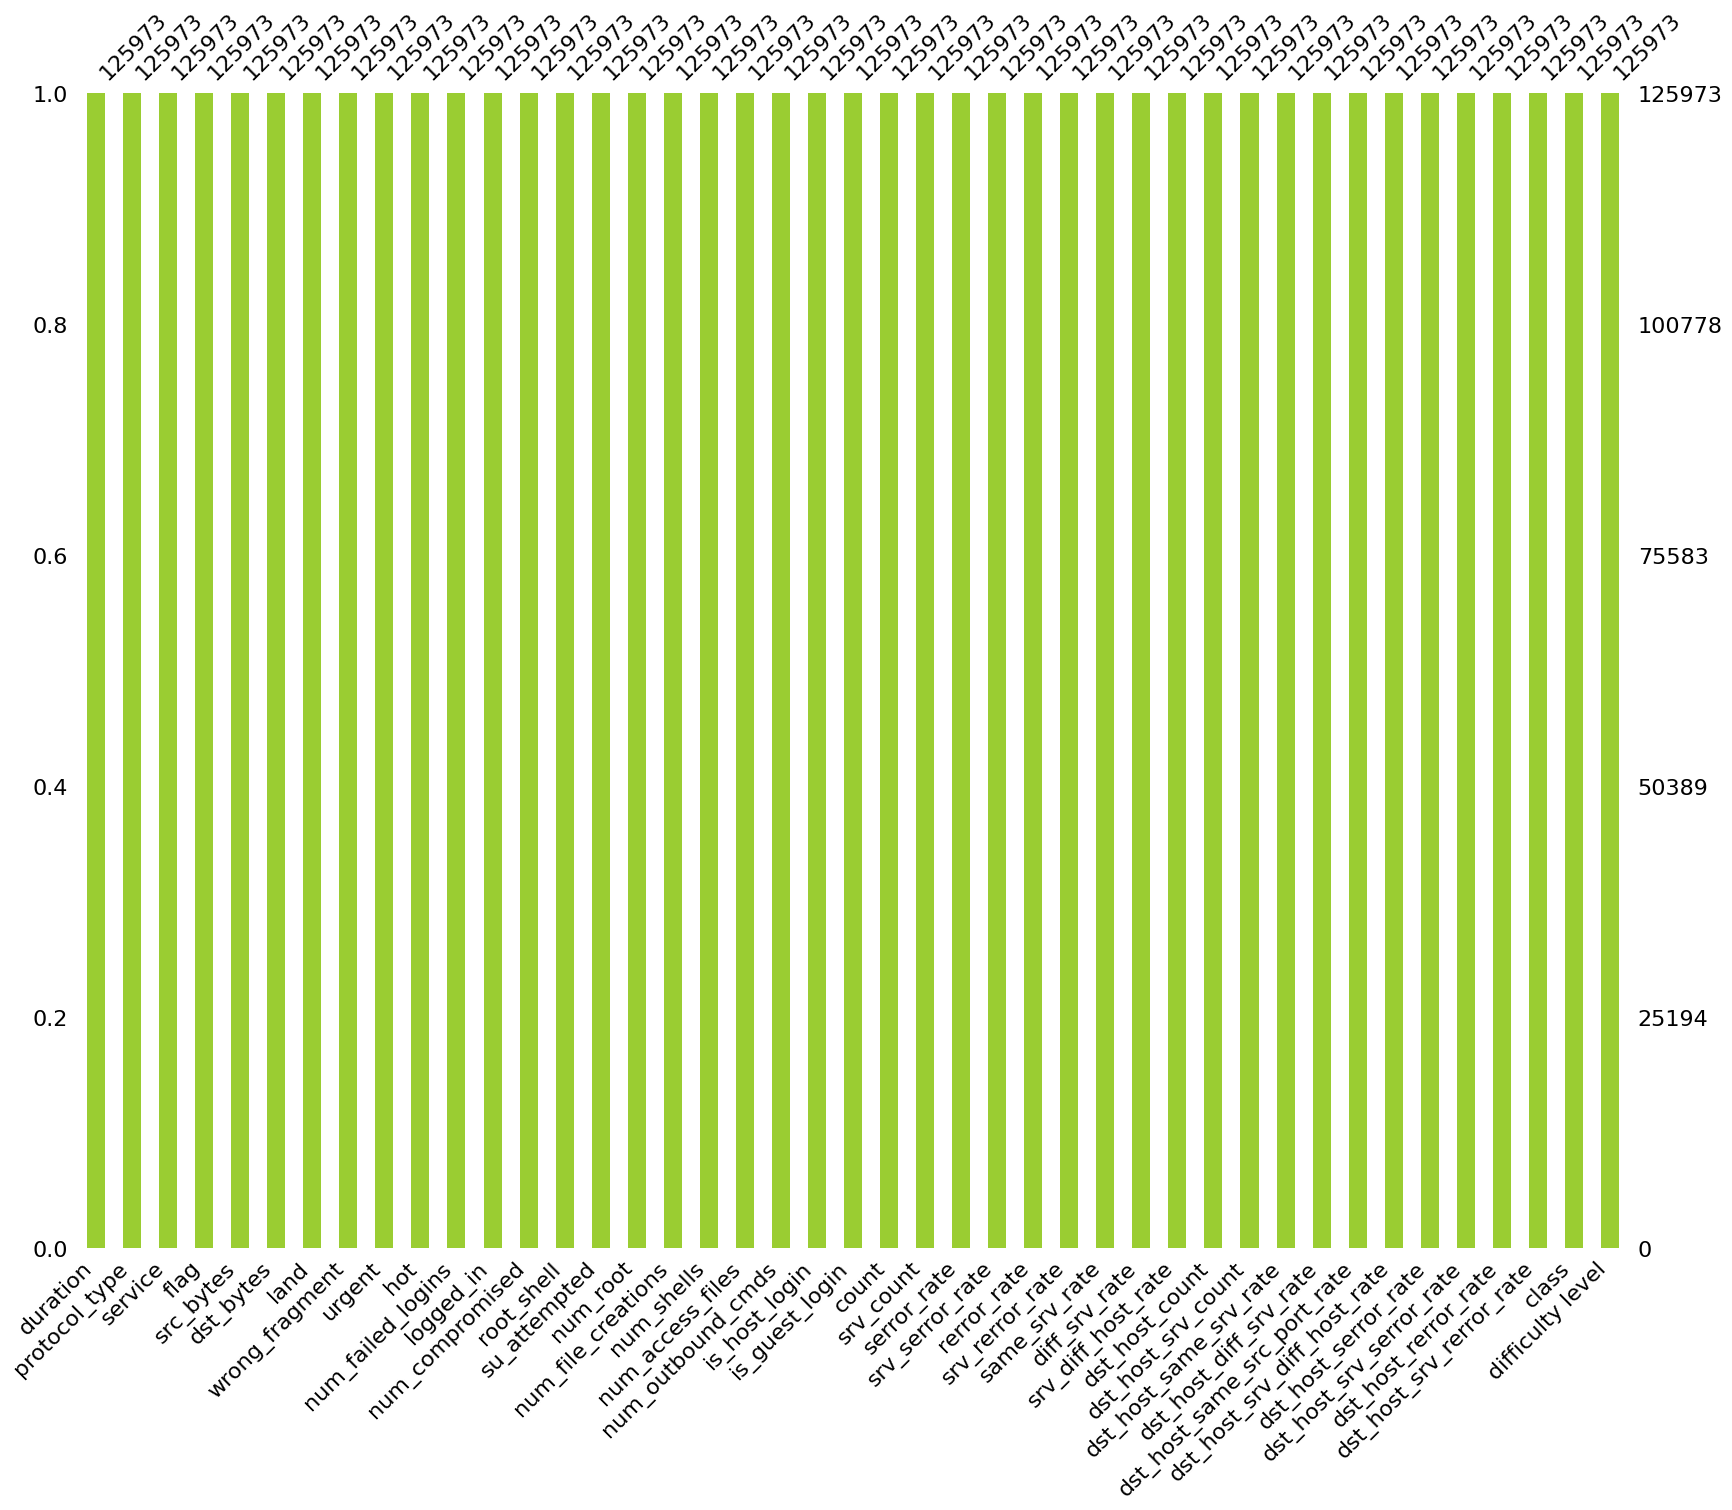

In [16]:
mn.bar(train_df, color = 'yellowgreen', figsize = (20,15))


In [17]:
test_df = pd.read_csv("KDDTest+.txt", names = col_names)
test_df
test_df.info()
test_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<Axes: >

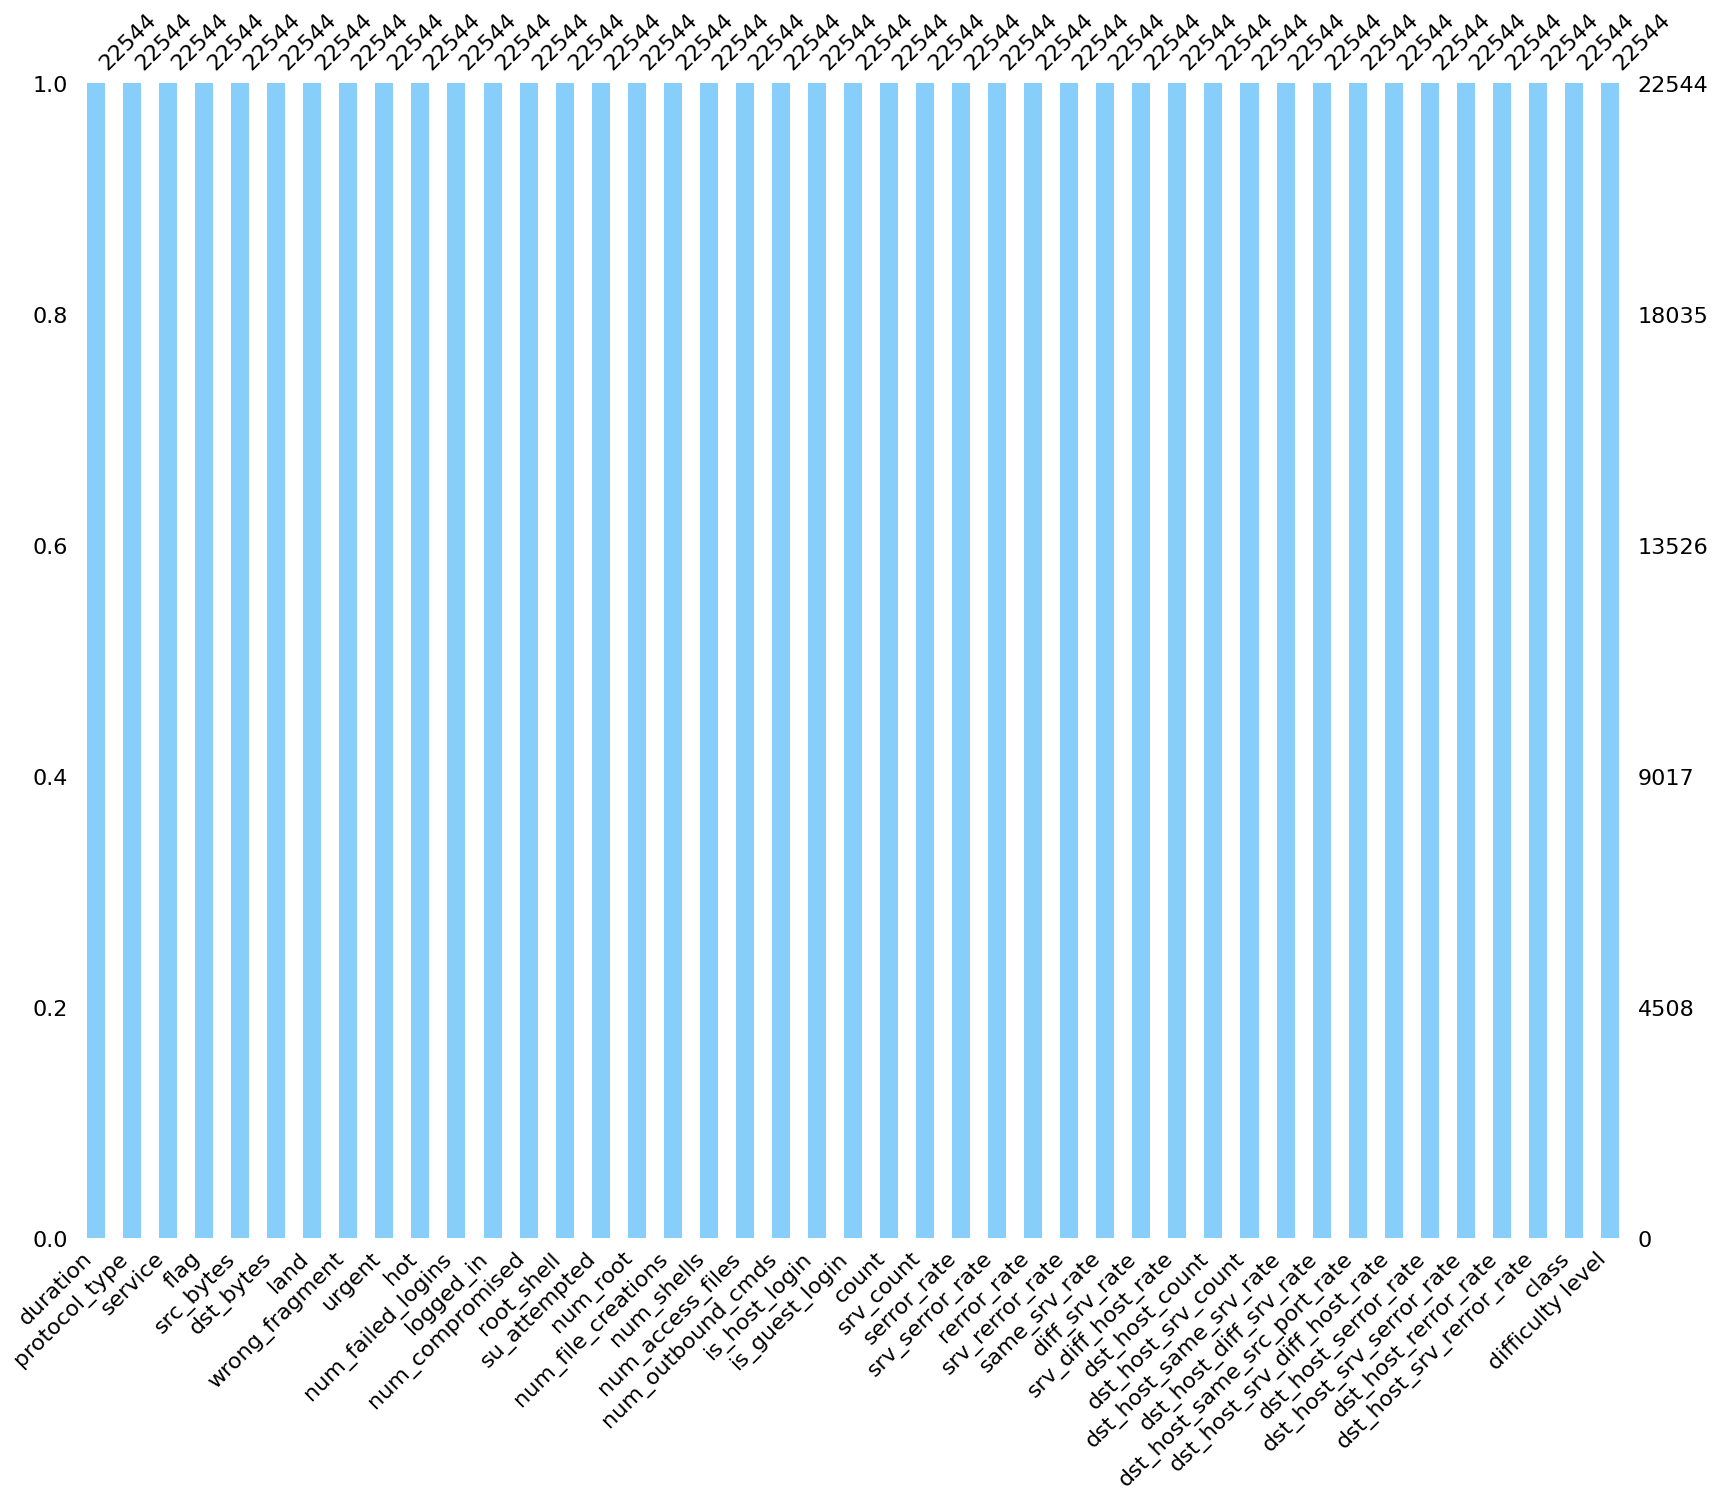

In [18]:
mn.bar(test_df, color = 'lightskyblue', figsize = (20,15)) # no missing data found in test data also

In [19]:

train_df['class'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [20]:
train_df['difficulty level'].unique()

array([20, 15, 19, 21, 18, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4], dtype=int64)

In [21]:
classLabel_counts = train_df.groupby(['class']).size()
classLabel_counts

class
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
dtype: int64

In [22]:
per_classLabels = classLabel_counts/train_df.shape[0]*100
per_classLabels

class
back                0.758893
buffer_overflow     0.023815
ftp_write           0.006351
guess_passwd        0.042073
imap                0.008732
ipsweep             2.856961
land                0.014289
loadmodule          0.007144
multihop            0.005557
neptune            32.716534
nmap                1.185175
normal             53.458281
perl                0.002381
phf                 0.003175
pod                 0.159558
portsweep           2.326689
rootkit             0.007938
satan               2.883951
smurf               2.100450
spy                 0.001588
teardrop            0.708088
warezclient         0.706501
warezmaster         0.015876
dtype: float64

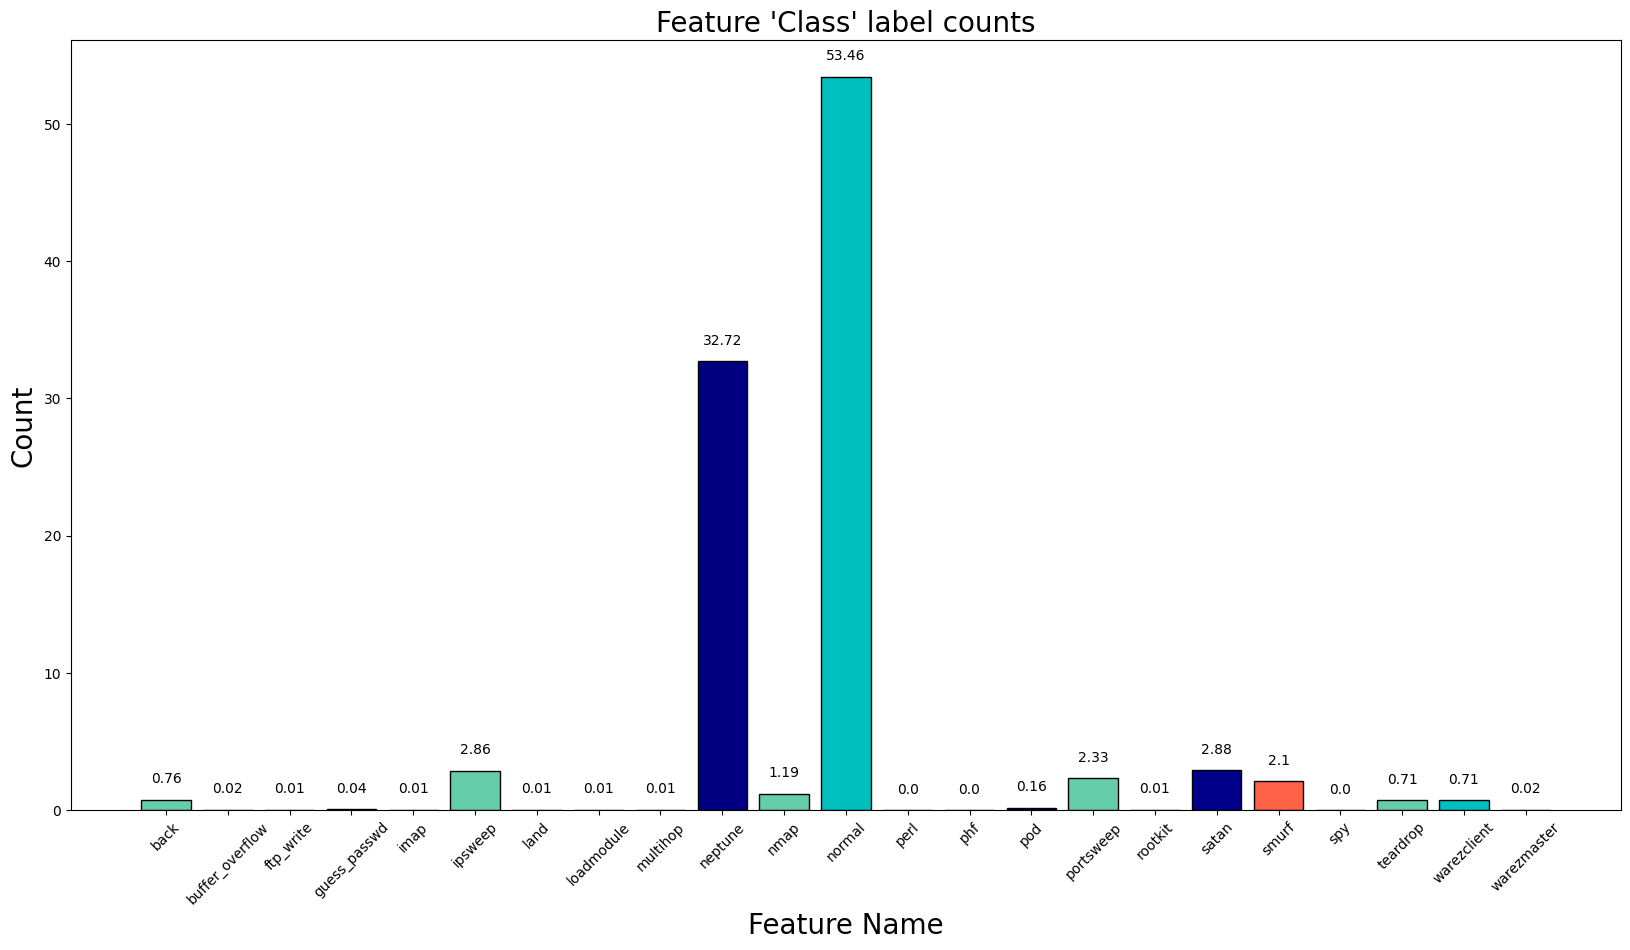

In [23]:

fig = plt.figure(figsize = (20,10))
r_ = [round(each, 2) for each in per_classLabels.values]
ax = fig.add_subplot(111)
ax.bar(per_classLabels.index, per_classLabels.values, color = ["mediumaquamarine", 'c', 'darkblue', 'tomato', 'navy'], edgecolor = 'black')
ax.set_xticklabels(per_classLabels.index, rotation = 45)
ax.set_xlabel("Feature Name", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Feature 'Class' label counts", fontsize = 20)

for i in range(len(per_classLabels.values)):
    plt.annotate(str(r_[i]), xy=(per_classLabels.index[i],r_[i]+1), ha='center', va='bottom')

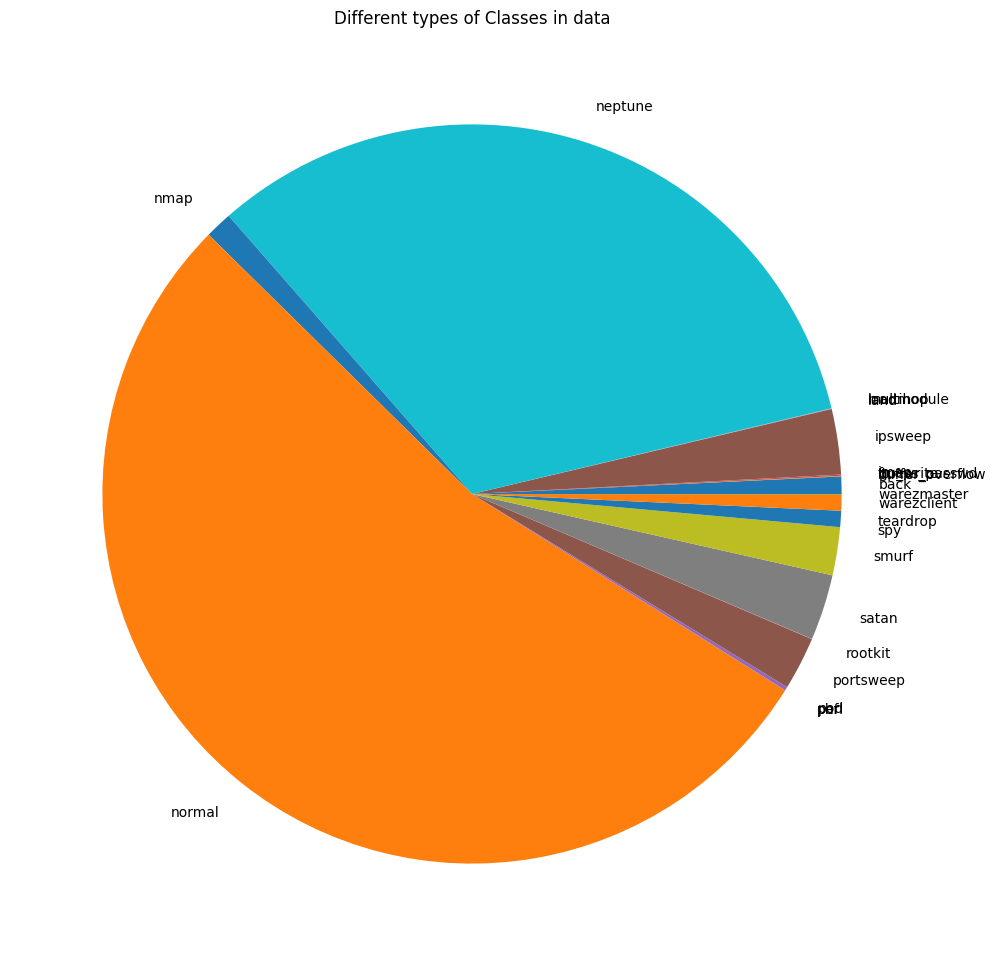

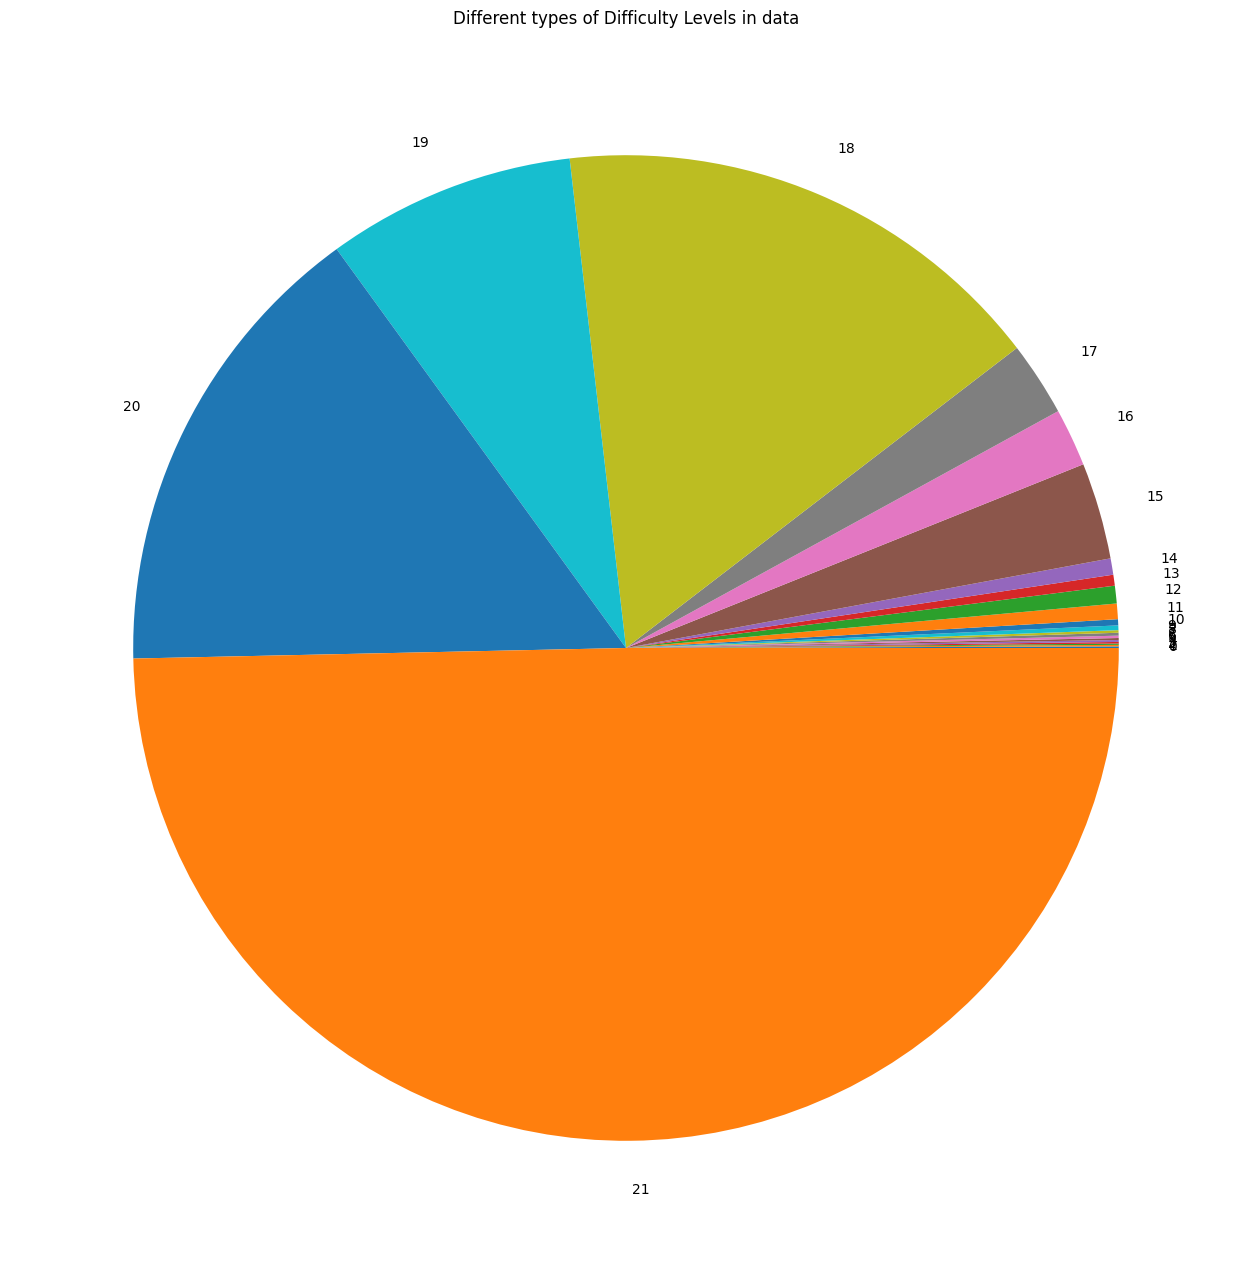

In [24]:
group_data = train_df.groupby('class').size()
plt.figure(figsize = (15,12))
group_data.plot(kind='pie')
plt.title("Different types of Classes in data")
plt.ylabel("")
plt.show()
group_data = train_df.groupby('difficulty level').size()
plt.figure(figsize = (16,16))
group_data.plot(kind='pie')
plt.title("Different types of Difficulty Levels in data")
plt.ylabel("")
plt.show()

In [25]:
train_df
Dos = ['land','neptune','smurf','pod','back','teardrop']
Probe = ['portsweep','ipsweep','satan','nmap']
U2R = ['buffer_overflow','loadmodule','perl','rootkit']

In [26]:

def encode_attack(vec):
    if vec in Dos:
        return "Dos"
    elif vec in Probe:
        return "Probe";
    elif vec in U2R:
        return "U2R"
    elif vec == "normal":
        return "normal"
    else:
        return "R2L"
train_df['attack_type'] = train_df['class'].apply(encode_attack)
train_df.iloc[:10, -5:]
train_df.groupby('attack_type').size()

attack_type
Dos       45927
Probe     11656
R2L         995
U2R          52
normal    67343
dtype: int64

In [27]:

percent_data = (train_df.groupby('attack_type').size())/train_df.shape[0] * 100
percent_data

attack_type
Dos       36.457812
Probe      9.252776
R2L        0.789852
U2R        0.041279
normal    53.458281
dtype: float64

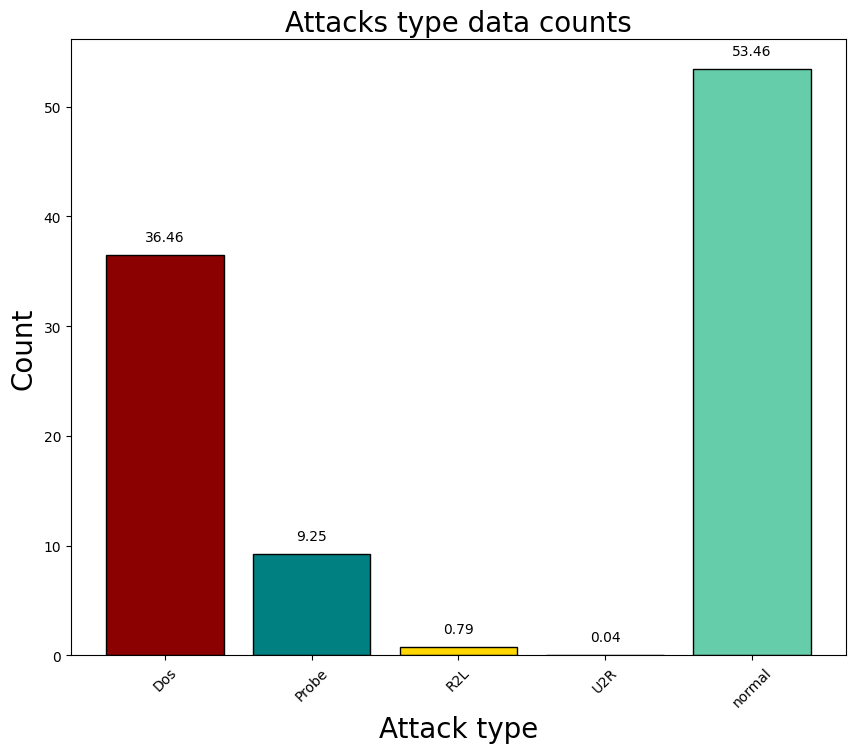

In [28]:

fig = plt.figure(figsize = (10,8))
r_ = [round(each, 2) for each in percent_data.values]
ax = fig.add_subplot(111)
ax.bar(percent_data.index, percent_data.values, color = ['darkred', 'teal', 'gold', 'lightseagreen', "mediumaquamarine"], edgecolor = 'black')
ax.set_xticklabels(percent_data.index, rotation = 45)
ax.set_xlabel("Attack type", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attacks type data counts", fontsize = 20)

for i in range(len(percent_data.values)):
    plt.annotate(str(r_[i]), xy=(percent_data.index[i],r_[i]+1), ha='center', va='bottom')

In [29]:
group_data = train_df.groupby('attack_type').size()
plt.figure(figsize = (10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

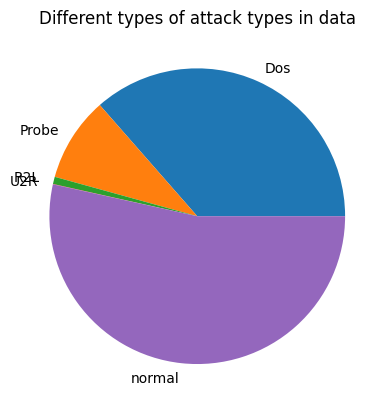

In [30]:
group_data.plot(kind='pie')
plt.title("Different types of attack types in data")
plt.ylabel("")
plt.show()

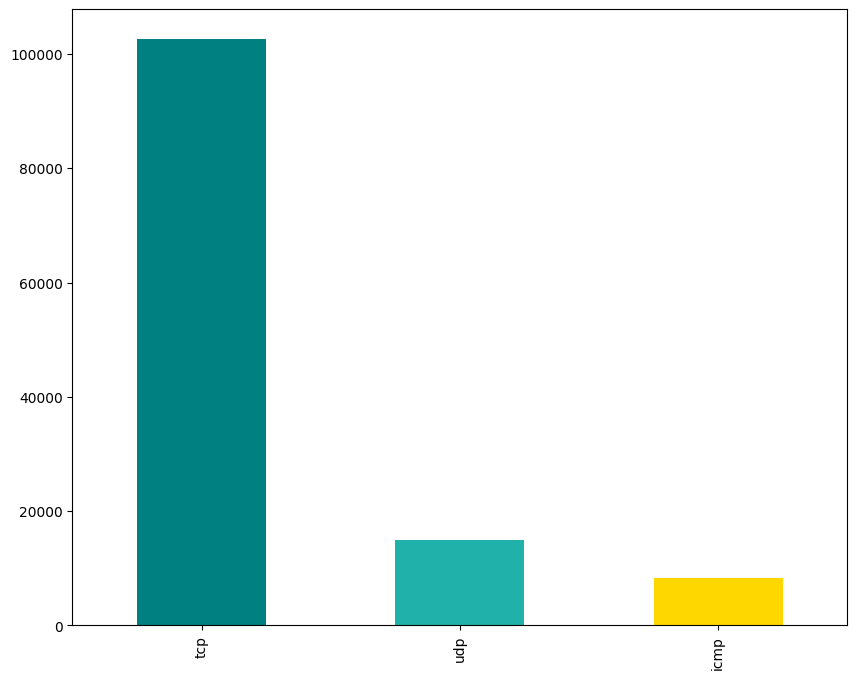

In [31]:

plt.subplots(figsize=(10,8))
train_df['protocol_type'].value_counts(normalize = True)
train_df['protocol_type'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

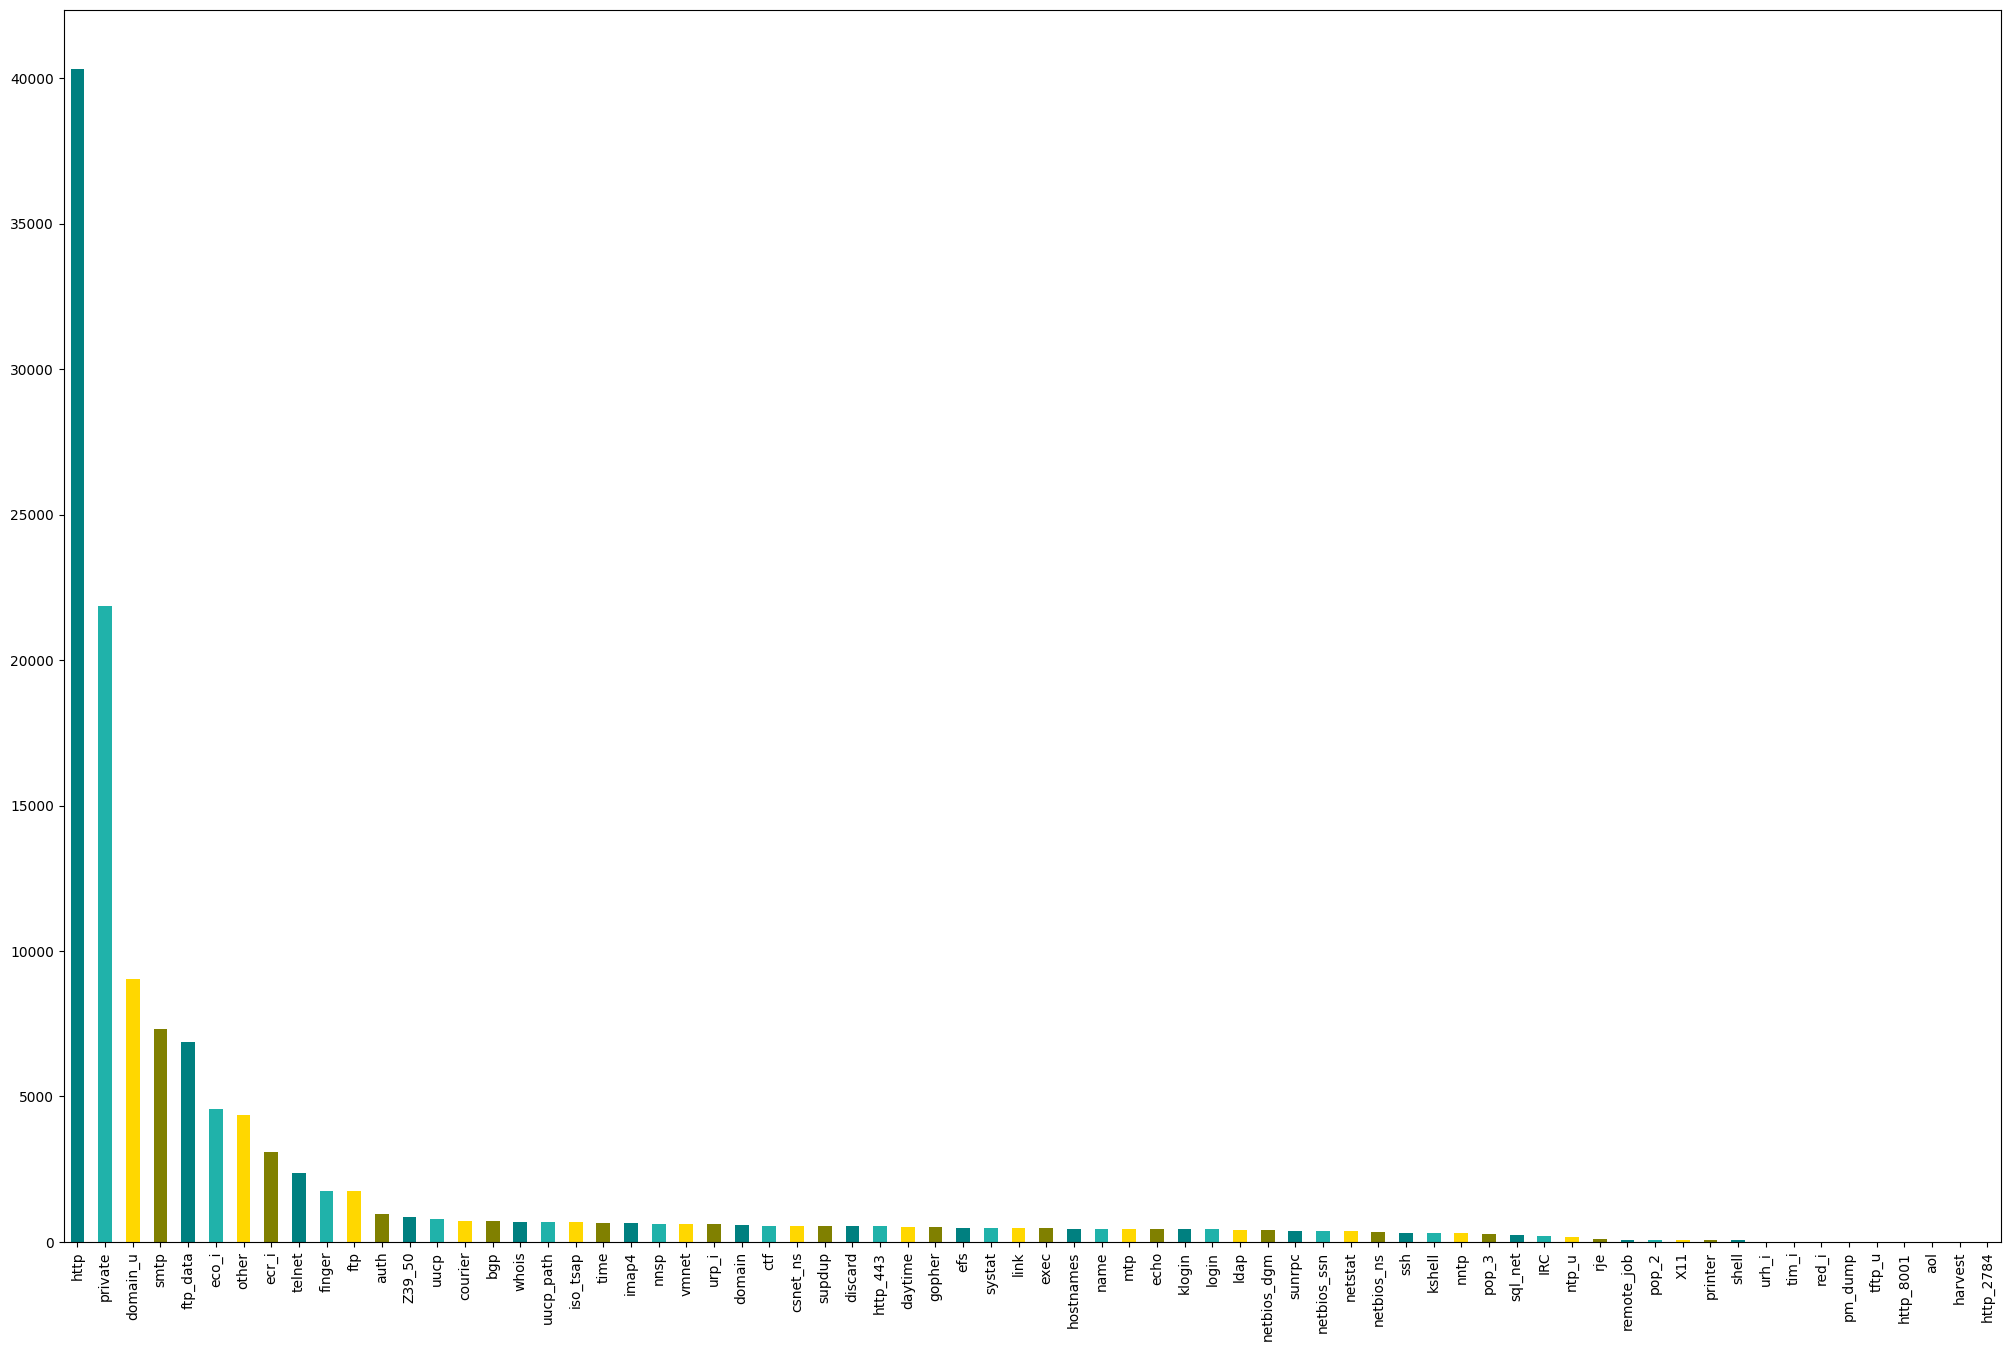

In [32]:
plt.subplots(figsize=(25,16))
train_df['service'].value_counts(normalize = True)
train_df['service'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

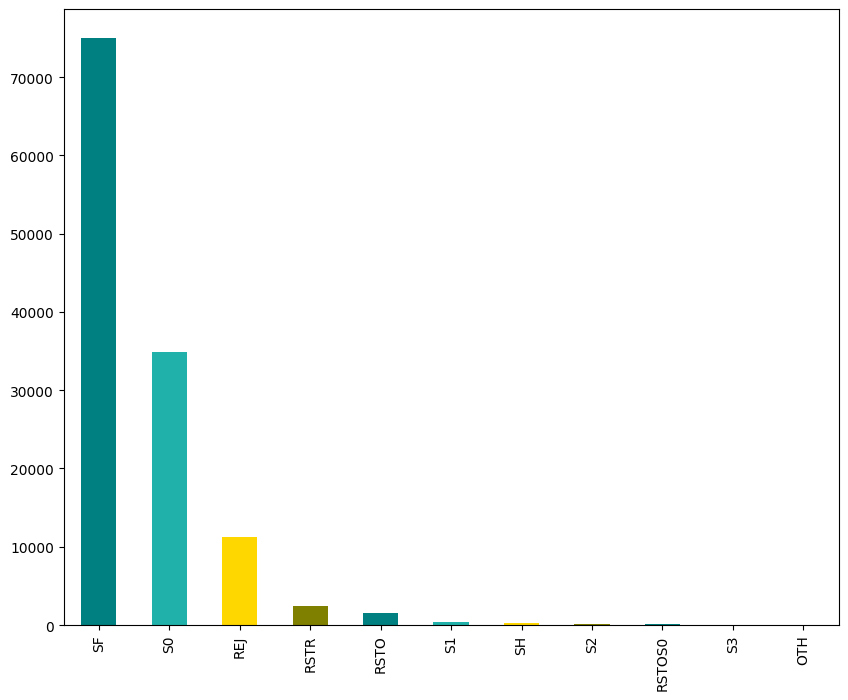

In [33]:
plt.subplots(figsize=(10,8))
train_df['flag'].value_counts(normalize = True)
train_df['flag'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

In [34]:
stop_words = set(sw)

word_cloud = wc(stopwords = stop_words).generate(str(train_df['flag']))
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['lines.color'] = 'gold'
print(word_cloud)


<Figure size 3000x4000 with 0 Axes>

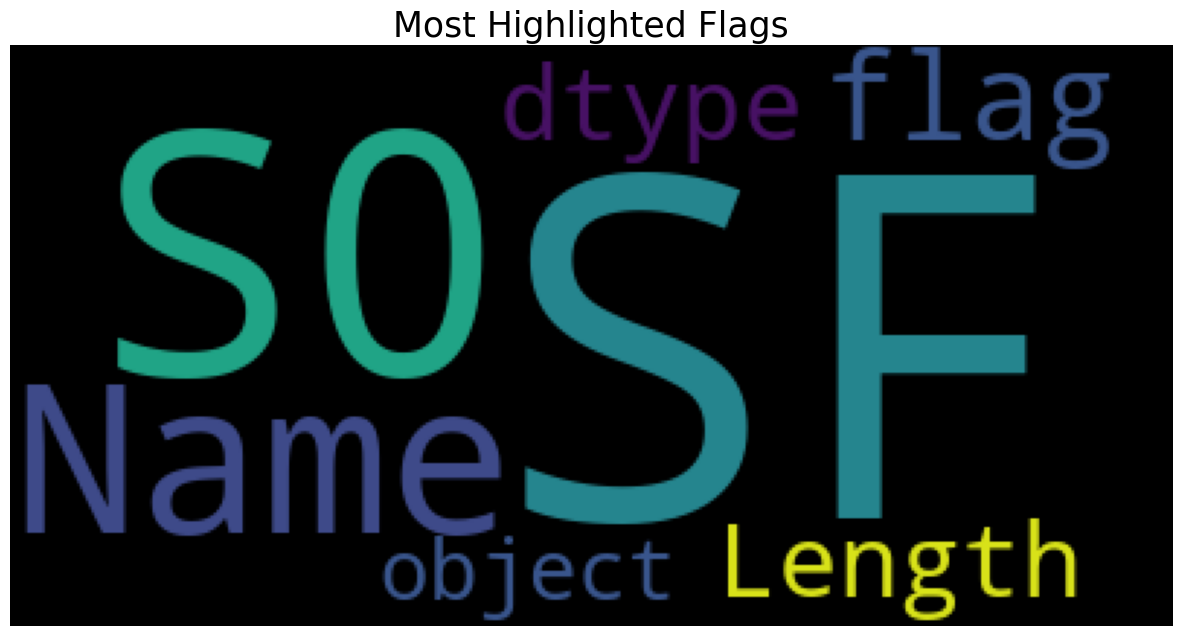

<Figure size 3000x4000 with 0 Axes>

In [35]:

plt.imshow(word_cloud)
plt.title('Most Highlighted Flags', fontsize = 25)
plt.axis("off")
plt.figure(figsize=(30, 40))

<Axes: >

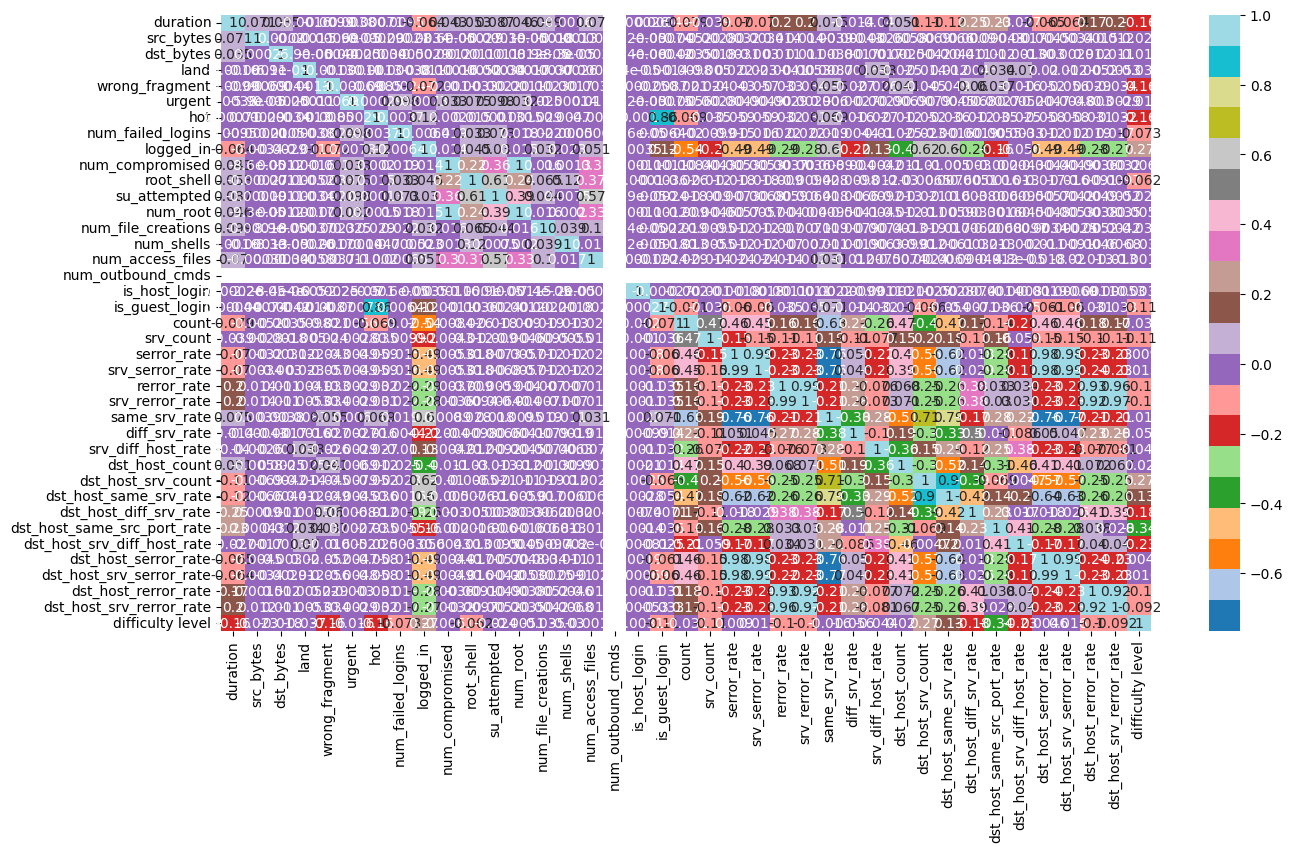

In [36]:
sns.heatmap(train_df.corr(), annot=True, cmap="tab20", annot_kws={"size":10})

<Figure size 1000x800 with 0 Axes>

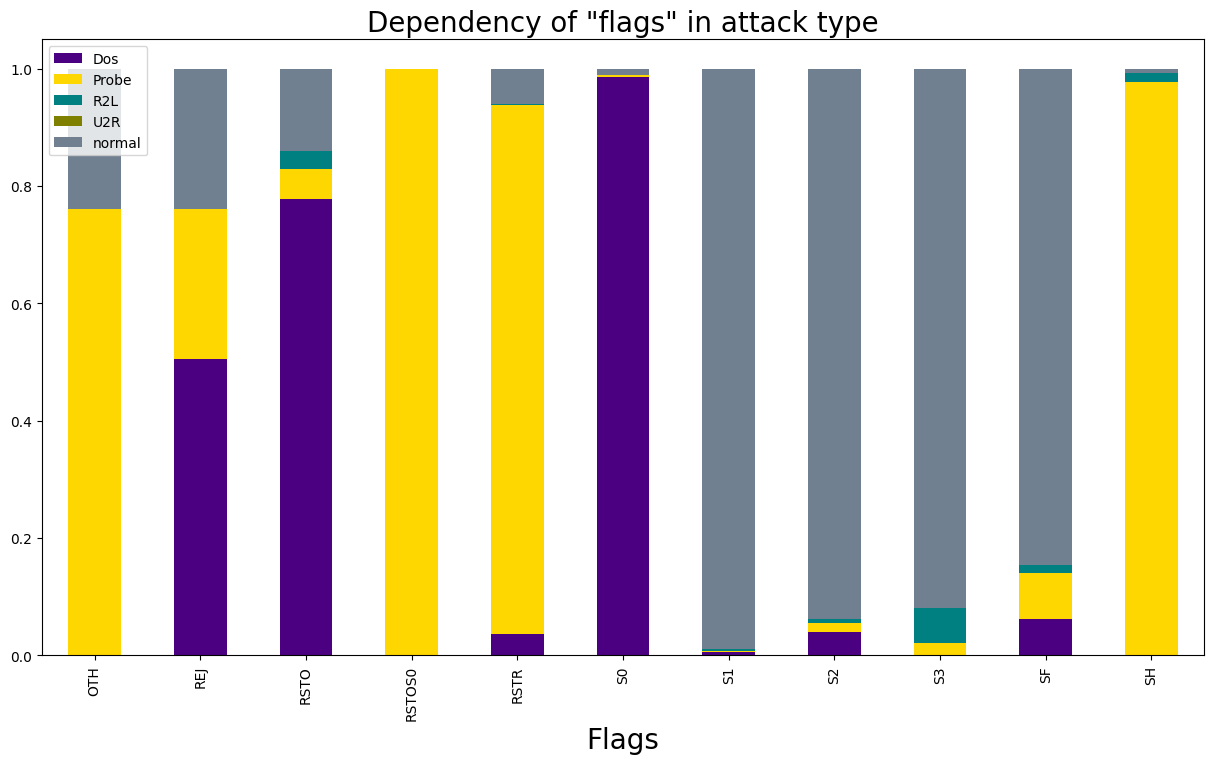

In [37]:

train_df
numerical_cols = [one for each,one in zip(list(train_df.dtypes),train_df.dtypes.index)  if each == 'int64' or each == 'float64']
numerical_cols
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(train_df['flag'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', 'slategrey'])

plt.title('Dependency of "flags" in attack type', fontsize = 20)
plt.xlabel('Flags', fontsize = 20)
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

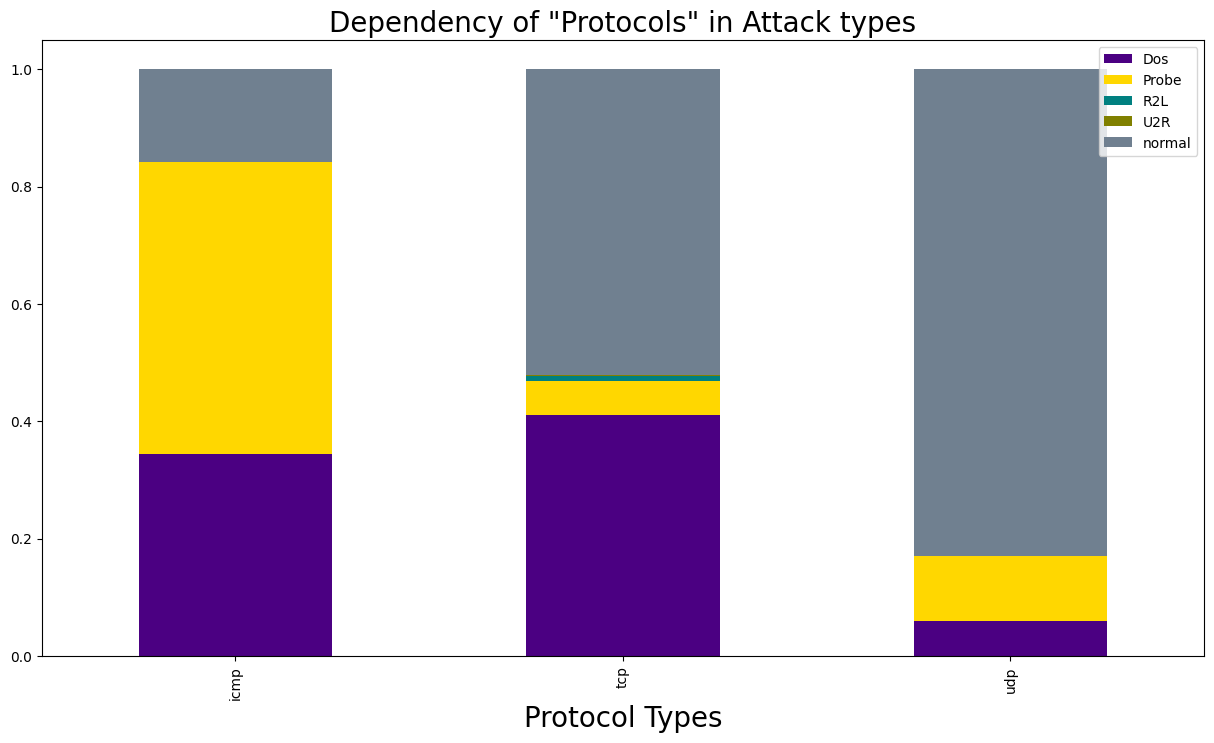

In [38]:

fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(train_df['protocol_type'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', 'slategrey'])

plt.title('Dependency of "Protocols" in Attack types', fontsize = 20)
plt.xlabel('Protocol Types', fontsize = 20)
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

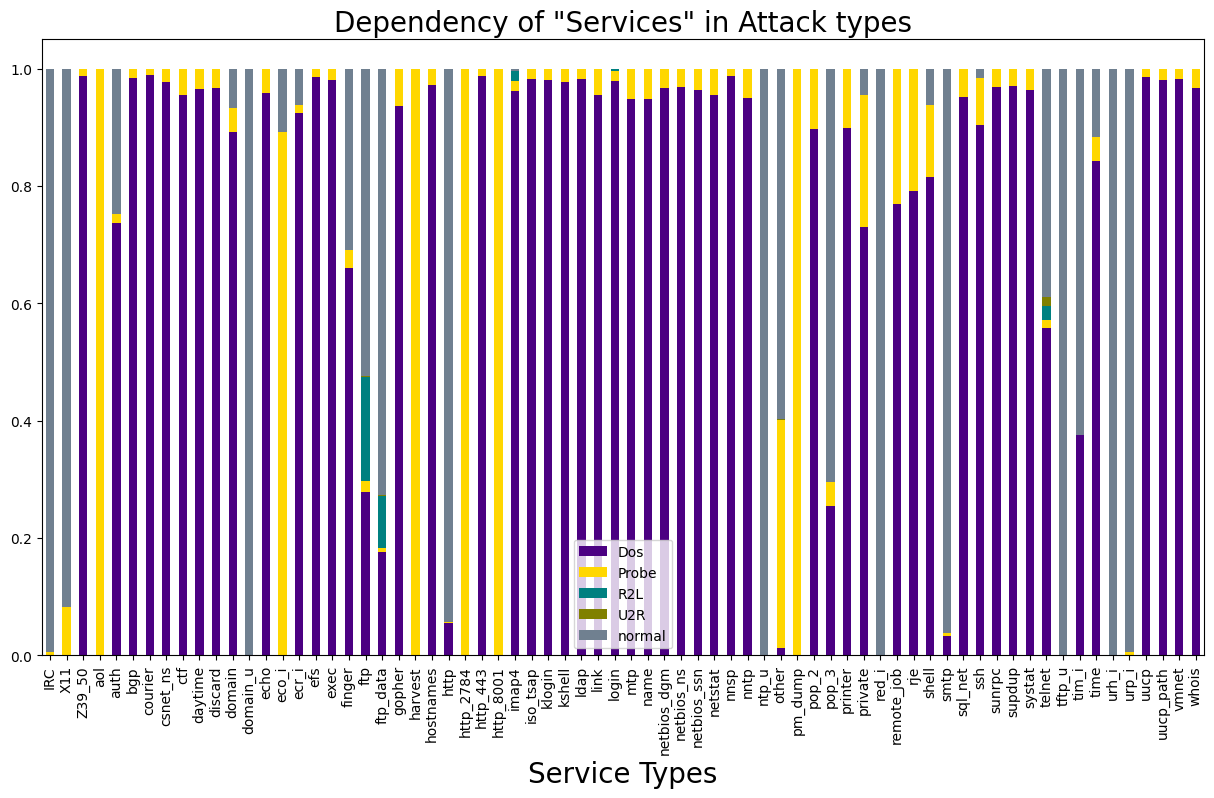

In [39]:

fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(train_df['service'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', "slategrey"])

plt.title('Dependency of "Services" in Attack types', fontsize = 20)
plt.xlabel('Service Types', fontsize = 20)
plt.legend()
plt.show()

attack_type         Dos  Probe  R2L  U2R  normal
difficulty level                                
0                     0     25   38    3       0
1                     0     37   13    9       3
2                     0     19   20   13       2
3                     2     22   34    3       4
4                     3     21   39    7       9
5                     5     33   24    4      15
6                    14     52   21    1       8
7                     9     52   34    1      22
8                    14     32   47    0      13
9                    42     27   79    1      45
10                   71     38  101    3      40
11                  319     95  166    2      59
12                  351    141  113    3     121
13                   93    157   89    1     111
14                   66    191   94    1     322
15                  618   3079   63    0     230
16                  344   1733    9    0     307
17                  357   1578    6    0    1133
18                11

<Figure size 1000x800 with 0 Axes>

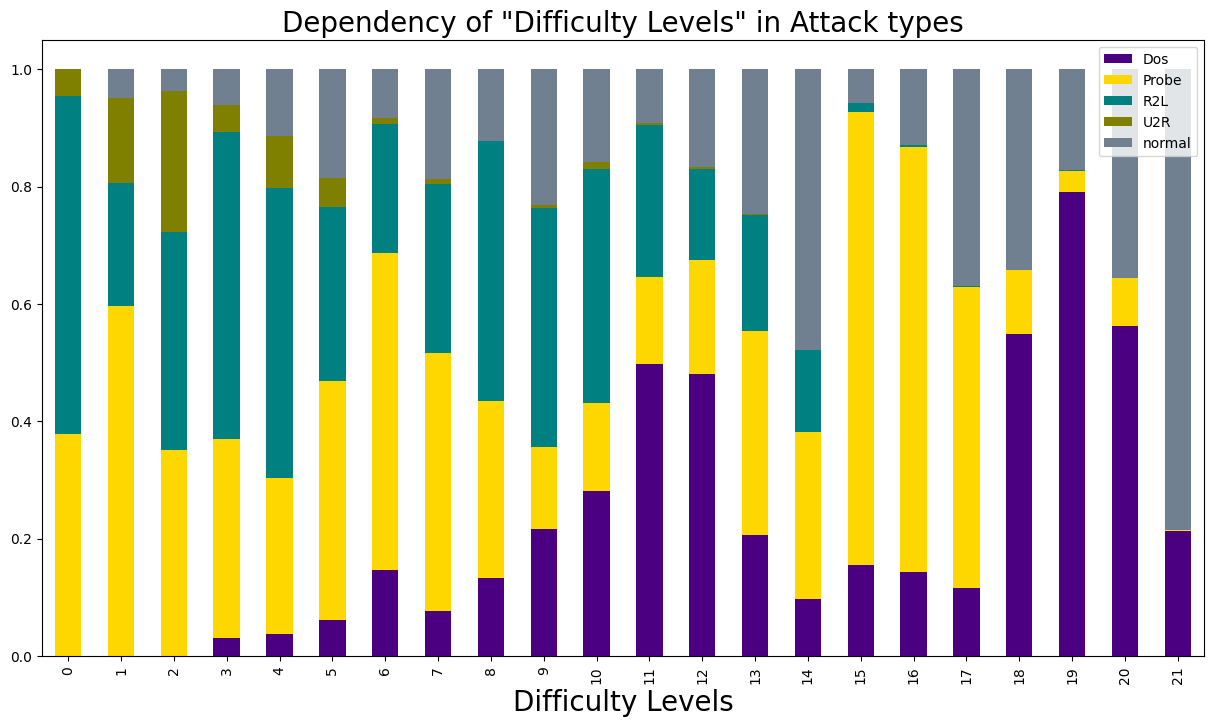

In [40]:

fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(train_df['difficulty level'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', "slategrey"])
print(avg_pro)

plt.title('Dependency of "Difficulty Levels" in Attack types', fontsize = 20)
plt.xlabel('Difficulty Levels', fontsize = 20)
plt.legend()
plt.show()

In [41]:

#train_df.head(10)
def attack_encode(value):
    if value == 'normal':
        return 0;
    elif value == "Dos":
        return 1;
    elif value == 'Probe':
        return 2;
    elif value == 'R2L':
        return 3;
    else:
        return 4;

In [42]:

train_df['intrusion_code'] = train_df['attack_type'].apply(attack_encode)
train_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0.00,normal,20,normal,0
1,0.00,normal,15,normal,0
2,0.00,neptune,19,Dos,1
3,0.01,normal,21,normal,0
4,0.00,normal,21,normal,0
5,1.00,neptune,21,Dos,1
6,0.00,neptune,21,Dos,1
7,0.00,neptune,21,Dos,1
8,0.00,neptune,21,Dos,1
9,0.00,neptune,21,Dos,1


In [43]:
train_df[train_df['intrusion_code'] == 2].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
17,0.0,ipsweep,18,Probe,2
30,0.0,ipsweep,17,Probe,2
33,1.0,portsweep,20,Probe,2
56,0.0,nmap,17,Probe,2
62,1.0,satan,18,Probe,2


In [44]:
train_df[train_df['intrusion_code'] == 3].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
13,0.0,warezclient,15,R2L,3
48,0.0,warezclient,12,R2L,3
148,0.0,warezclient,11,R2L,3
190,0.0,warezclient,2,R2L,3
222,0.0,warezclient,12,R2L,3


In [45]:
train_df[train_df['intrusion_code'] == 4].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
3173,0.0,rootkit,1,U2R,4
5579,0.0,buffer_overflow,9,U2R,4
5831,0.0,buffer_overflow,12,U2R,4
8675,0.0,buffer_overflow,2,U2R,4
11448,0.0,rootkit,0,U2R,4


In [46]:

test_df
test_df['attack_type'] = test_df['class'].apply(encode_attack)
test_df.iloc[:20, -10:]

,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
1,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
2,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,normal
3,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,R2L
4,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,R2L
5,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,normal
6,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,normal
7,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,R2L
8,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,normal
9,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,R2L


In [47]:

test_df['intrusion_code'] = test_df['attack_type'].apply(attack_encode)
test_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,1.00,neptune,21,Dos,1
1,1.00,neptune,21,Dos,1
2,0.00,normal,21,normal,0
3,0.00,saint,15,R2L,3
4,0.71,mscan,11,R2L,3
5,0.00,normal,21,normal,0
6,0.04,normal,21,normal,0
7,0.02,guess_passwd,15,R2L,3
8,0.00,normal,21,normal,0
9,0.00,guess_passwd,7,R2L,3


In [48]:
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1


In [49]:
test_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,normal,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,R2L,3
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,R2L,3
5,0,tcp,http,SF,267,14515,0,0,0,0,...,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,normal,0
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,normal,0
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,R2L,3
8,0,tcp,http,SF,327,467,0,0,0,0,...,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,normal,0
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,R2L,3


In [50]:
train_df = train_df.drop(columns = ['class','difficulty level', 'attack_type'])
test_df = test_df.drop(columns = ['class', 'difficulty level','attack_type'])
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [51]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,3
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,3


In [52]:
train_df.corr()['intrusion_code'].sort_values(ascending = False)

intrusion_code                 1.000000
dst_host_diff_srv_rate         0.391328
count                          0.388358
dst_host_srv_serror_rate       0.384796
dst_host_serror_rate           0.382118
serror_rate                    0.381646
srv_serror_rate                0.378669
dst_host_same_src_port_rate    0.319096
dst_host_srv_rerror_rate       0.310227
srv_rerror_rate                0.309909
rerror_rate                    0.308668
dst_host_rerror_rate           0.293805
diff_srv_rate                  0.282314
dst_host_srv_diff_host_rate    0.239646
dst_host_count                 0.196102
duration                       0.129443
hot                            0.065085
wrong_fragment                 0.054795
is_guest_login                 0.030600
num_failed_logins              0.023120
src_bytes                      0.012981
srv_diff_host_rate             0.010456
dst_bytes                      0.008651
root_shell                     0.007758
num_shells                     0.005208


In [53]:
category_df = train_df.select_dtypes('object')

In [54]:
dummy_df = pd.get_dummies(category_df)
dummy_df['intrusion_code'] = train_df['intrusion_code']

dummy_df.head()
dummy_df.corr()['intrusion_code'].sort_values(ascending=False)


intrusion_code        1.000000
service_private       0.398863
flag_S0               0.373549
service_eco_i         0.338355
protocol_type_icmp    0.292874
                        ...   
protocol_type_udp    -0.155004
service_smtp         -0.189656
service_domain_u     -0.229571
service_http         -0.511499
flag_SF              -0.548643
Name: intrusion_code, Length: 85, dtype: float64

In [55]:
train_df.columns
train_df = train_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'])

test_df = test_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'
                                 ])

In [56]:
train_df.tail(10)

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
125963,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0
125964,0,tcp,private,S0,0,0,0,0,0,0,...,12,0.05,0.06,0.00,0.00,1.00,1.0,0.00,0.0,1
125965,0,tcp,smtp,SF,0,0,1,0,0,0,...,2,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.0,0
125966,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,1.00,1.0,0.00,0.0,1
125967,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.0,0.00,0.0,0
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.0,1
125969,8,udp,private,SF,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.0,0
125970,0,tcp,smtp,SF,0,0,1,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.0,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.0,1
125972,0,tcp,ftp_data,SF,0,0,1,0,0,0,...,77,0.30,0.03,0.30,0.00,0.00,0.0,0.00,0.0,0


In [57]:
test_df.head(10)

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
2,2,tcp,ftp_data,SF,0,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0
3,0,icmp,eco_i,SF,0,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,3
4,1,tcp,telnet,RSTO,0,0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,3
5,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0
6,0,tcp,smtp,SF,0,0,1,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0
7,0,tcp,telnet,SF,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,3
8,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0
9,0,tcp,ftp,SF,0,0,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,3


In [58]:
train_df.corr()['intrusion_code'].sort_values(ascending = False)


intrusion_code                 1.000000
dst_host_diff_srv_rate         0.391328
count                          0.388358
dst_host_srv_serror_rate       0.384796
dst_host_serror_rate           0.382118
serror_rate                    0.381646
srv_serror_rate                0.378669
dst_host_same_src_port_rate    0.319096
dst_host_srv_rerror_rate       0.310227
srv_rerror_rate                0.309909
rerror_rate                    0.308668
dst_host_rerror_rate           0.293805
diff_srv_rate                  0.282314
dst_host_srv_diff_host_rate    0.239646
dst_host_count                 0.196102
duration                       0.129443
hot                            0.065085
wrong_fragment                 0.054795
is_guest_login                 0.030600
srv_diff_host_rate             0.010456
root_shell                     0.007758
num_compromised               -0.009003
num_root                      -0.010020
num_file_creations            -0.014384
su_attempted                  -0.019483


In [59]:
train_df_new = pd.get_dummies(train_df)
test_df_new = pd.get_dummies(test_df)
print (train_df_new.shape)
print (test_df_new.shape)

(125973, 114)
(22544, 108)


In [60]:
set(train_df_new.columns).difference(set(test_df_new))

{'service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i'}

In [61]:
train_df_new
highly_correlated = train_df_new.corr().abs()['intrusion_code'].sort_values(ascending=False)
highly_correlated[:30]
list(highly_correlated[:30].index)

['intrusion_code',
 'dst_host_srv_count',
 'logged_in',
 'flag_SF',
 'dst_host_same_srv_rate',
 'service_http',
 'same_srv_rate',
 'service_private',
 'dst_host_diff_srv_rate',
 'count',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'srv_serror_rate',
 'flag_S0',
 'service_eco_i',
 'dst_host_same_src_port_rate',
 'dst_host_srv_rerror_rate',
 'srv_rerror_rate',
 'rerror_rate',
 'dst_host_rerror_rate',
 'protocol_type_icmp',
 'diff_srv_rate',
 'flag_RSTR',
 'dst_host_srv_diff_host_rate',
 'service_domain_u',
 'flag_REJ',
 'dst_host_count',
 'service_smtp',
 'protocol_type_udp']

In [62]:
train_df_new = train_df_new[list(highly_correlated[:30].index)]

In [63]:
test_df_new = train_df_new[list(highly_correlated[:30].index)]

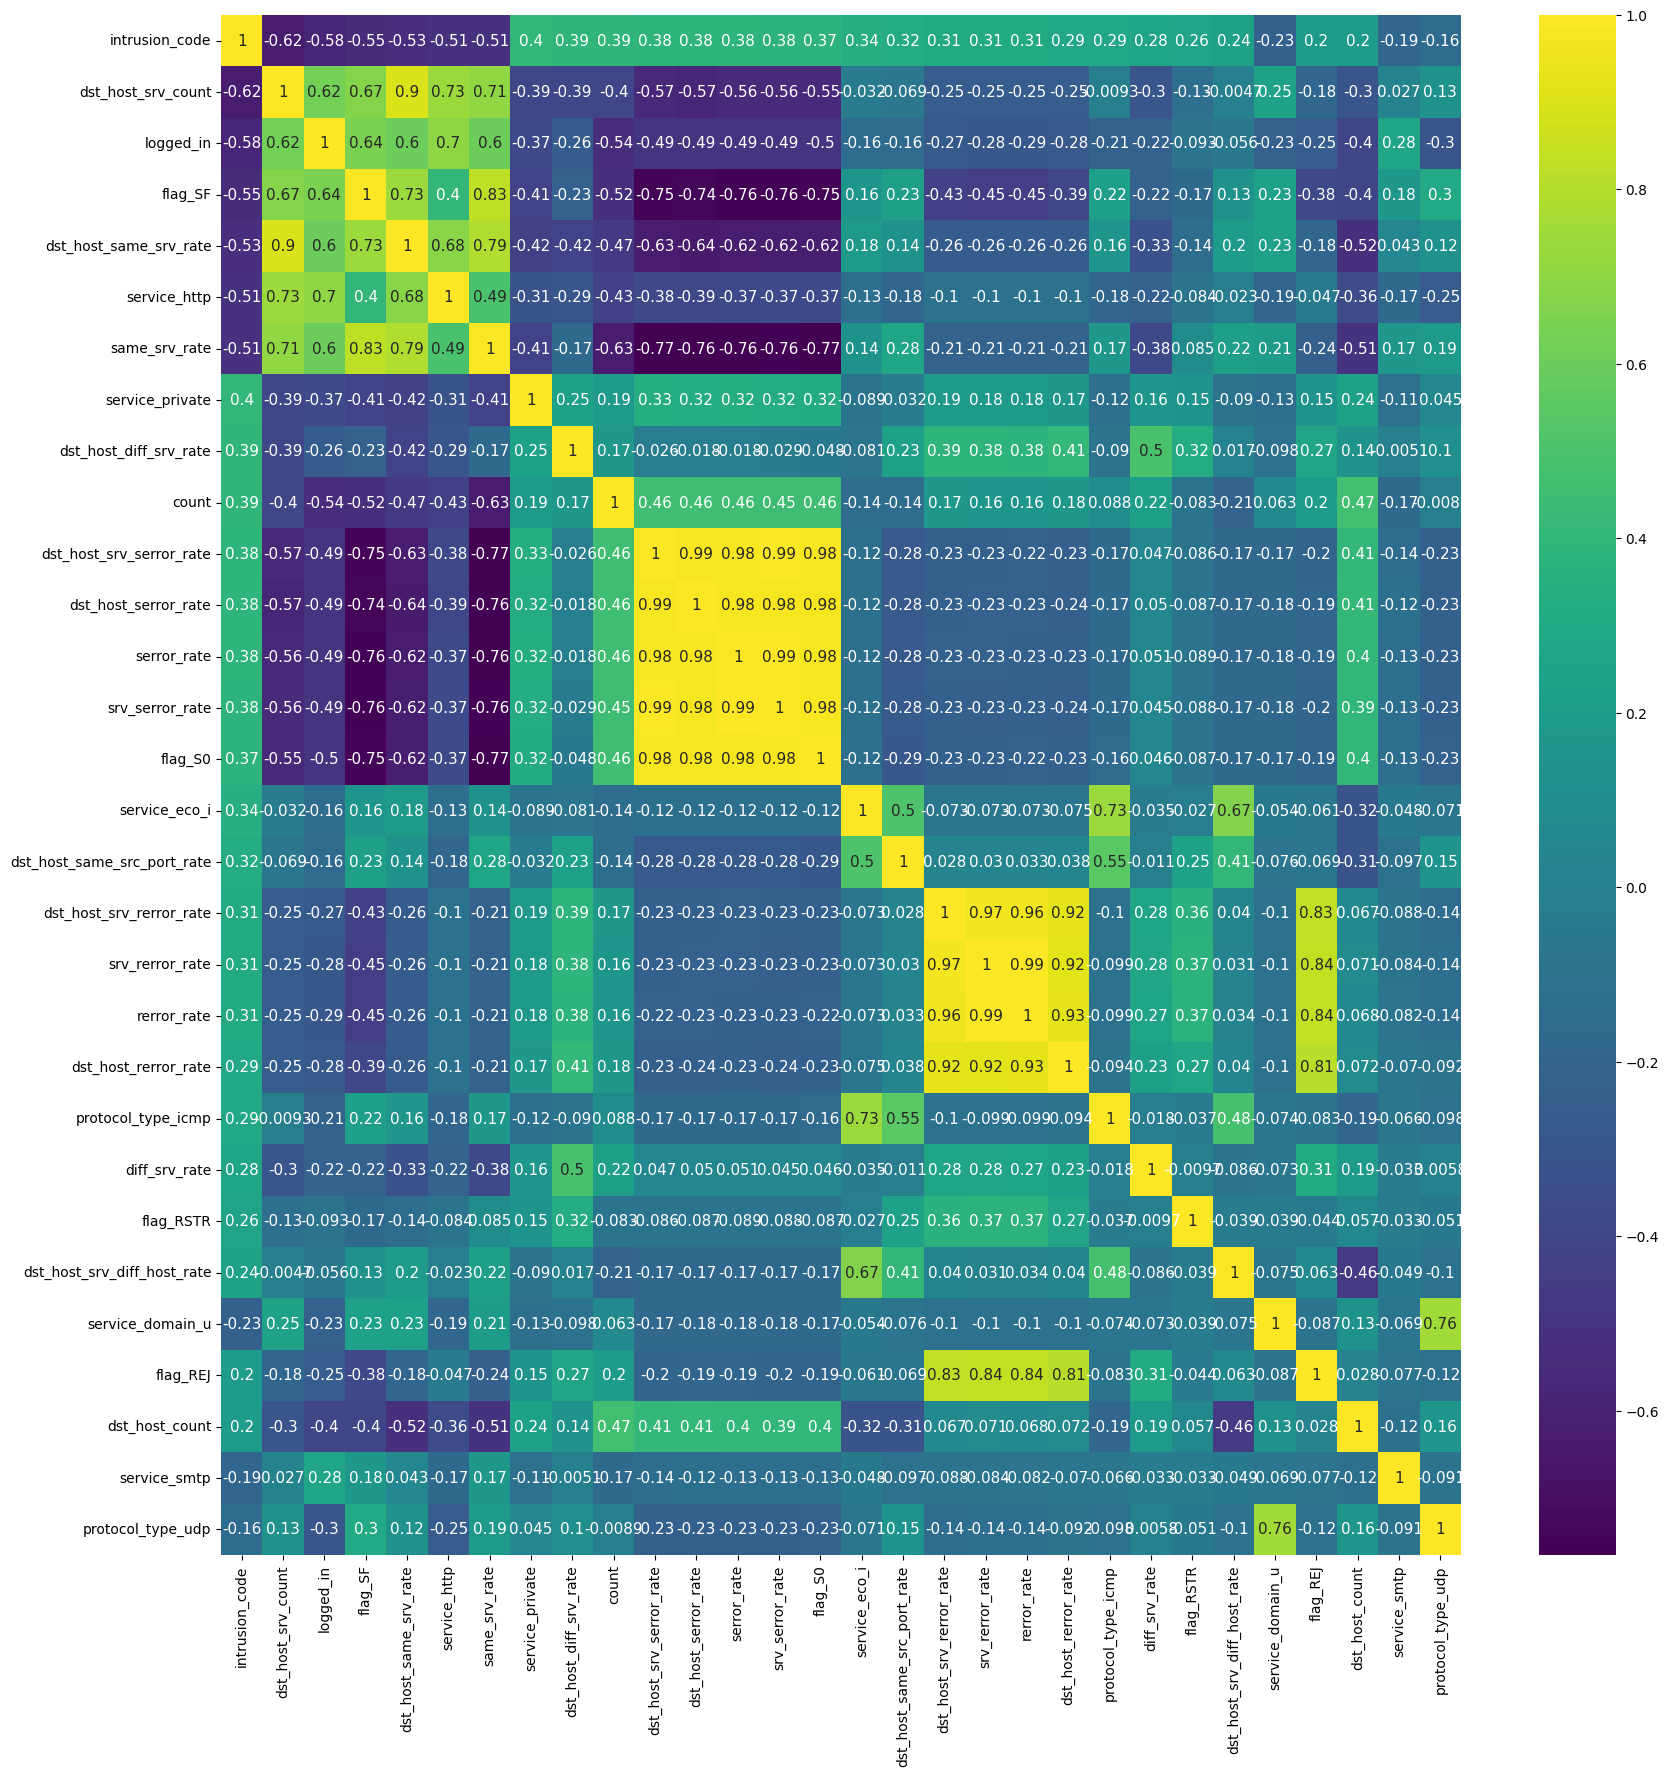

In [64]:
corr_df = train_df_new.corr()[train_df_new.corr().index]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_df, cmap='viridis', annot=True, annot_kws={"size": 11})
plt.show()

In [65]:
train_df_new.head(10)

,intrusion_code,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,...,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp
0,0,25,0,1,0.17,0,1.00,0,0.03,2,...,0.05,0,0.00,0,0.00,0,0,150,0,0
1,0,1,0,1,0.00,0,0.08,0,0.60,13,...,0.00,0,0.15,0,0.00,0,0,255,0,1
2,1,26,0,0,0.10,0,0.05,1,0.05,123,...,0.00,0,0.07,0,0.00,0,0,255,0,0
3,0,255,1,1,1.00,1,1.00,0,0.00,5,...,0.00,0,0.00,0,0.04,0,0,30,0,0
4,0,255,1,1,1.00,1,1.00,0,0.00,30,...,0.00,0,0.00,0,0.00,0,0,255,0,0
5,1,19,0,0,0.07,0,0.16,1,0.07,121,...,1.00,0,0.06,0,0.00,0,1,255,0,0
6,1,9,0,0,0.04,0,0.05,1,0.05,166,...,0.00,0,0.06,0,0.00,0,0,255,0,0
7,1,15,0,0,0.06,0,0.14,1,0.07,117,...,0.00,0,0.06,0,0.00,0,0,255,0,0
8,1,23,0,0,0.09,0,0.09,0,0.05,270,...,0.00,0,0.05,0,0.00,0,0,255,0,0
9,1,13,0,0,0.05,0,0.06,1,0.06,133,...,0.00,0,0.06,0,0.00,0,0,255,0,0


In [66]:
test_df_new.head(10)

,intrusion_code,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,...,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp
0,0,25,0,1,0.17,0,1.00,0,0.03,2,...,0.05,0,0.00,0,0.00,0,0,150,0,0
1,0,1,0,1,0.00,0,0.08,0,0.60,13,...,0.00,0,0.15,0,0.00,0,0,255,0,1
2,1,26,0,0,0.10,0,0.05,1,0.05,123,...,0.00,0,0.07,0,0.00,0,0,255,0,0
3,0,255,1,1,1.00,1,1.00,0,0.00,5,...,0.00,0,0.00,0,0.04,0,0,30,0,0
4,0,255,1,1,1.00,1,1.00,0,0.00,30,...,0.00,0,0.00,0,0.00,0,0,255,0,0
5,1,19,0,0,0.07,0,0.16,1,0.07,121,...,1.00,0,0.06,0,0.00,0,1,255,0,0
6,1,9,0,0,0.04,0,0.05,1,0.05,166,...,0.00,0,0.06,0,0.00,0,0,255,0,0
7,1,15,0,0,0.06,0,0.14,1,0.07,117,...,0.00,0,0.06,0,0.00,0,0,255,0,0
8,1,23,0,0,0.09,0,0.09,0,0.05,270,...,0.00,0,0.05,0,0.00,0,0,255,0,0
9,1,13,0,0,0.05,0,0.06,1,0.06,133,...,0.00,0,0.06,0,0.00,0,0,255,0,0


In [67]:
train_df_new.shape

(125973, 30)

In [68]:
test_df_new.shape

(125973, 30)

In [69]:

X = train_df_new.drop(columns = 'intrusion_code')
y = train_df_new['intrusion_code']
X.shape
X.columns = X.columns.astype(str)
X = X.values


In [70]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)

In [80]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=10, min_samples_split = 2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [78]:

# Decision Tree Model


#KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import joblib
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:




ensemble_clf = VotingClassifier(estimators=[('decision_tree', dtree), ('knn', knn)], voting='hard')

# Train the ensemble classifier
ensemble_clf.fit(X_train, y_train)

# Store the trained model using joblib.dump
joblib.dump(ensemble_clf, 'revanth.joblib')


['revanth.joblib']

In [67]:
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Assuming X_train and y_train are already defined and scaled
# You might need to define or import them if not done already

# Standardize the test data
X_t = test_df_new.drop(columns='intrusion_code')
y_t = test_df_new['intrusion_code']

X_t.columns = X_t.columns.astype(str)
scaler = StandardScaler().fit(X_t)
X_t = scaler.transform(X_t)

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_t).reshape(-1, 1)

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_t).reshape(-1, 1)

# CatBoost Classifier
catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train, y_train)
pred_cat = catboost.predict(X_t).reshape(-1, 1)

# Ensure consistent shapes for the predictions
preds_combined = np.hstack((pred_rf, pred_xgb, pred_cat))

# Perform hard voting manually
pred_ensemble = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=preds_combined)

# Print classification report and confusion matrix
print("Ensemble Classifier - Classification Report:")
print(classification_report(y_t, pred_ensemble))

conf_mat_ensemble = confusion_matrix(y_t, pred_ensemble)
print("Ensemble Classifier - Confusion Matrix:")
print(conf_mat_ensemble)

# Calculate and print accuracy
accuracy_ensemble = (conf_mat_ensemble[0, 0] + conf_mat_ensemble[1, 1]) / conf_mat_ensemble.sum()
print("Ensemble Classifier - Accuracy:", round(accuracy_ensemble, 3))

# Save one of the classifiers (for example, Random Forest)
joblib.dump(rf, 'cat.joblib')


Ensemble Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67343
           1       1.00      1.00      1.00     45927
           2       1.00      1.00      1.00     11656
           3       0.96      0.93      0.95       995
           4       0.64      0.31      0.42        52

    accuracy                           1.00    125973
   macro avg       0.92      0.85      0.87    125973
weighted avg       1.00      1.00      1.00    125973

Ensemble Classifier - Confusion Matrix:
[[67237    45    19    33     9]
 [   55 45861    11     0     0]
 [   42     6 11608     0     0]
 [   73     0     0   922     0]
 [   34     1     0     1    16]]
Ensemble Classifier - Accuracy: 0.898


['cat.joblib']

In [74]:
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train and y_train are already defined and scaled
# You might need to define or import them if not done already

# Standardize the test data
X_t = test_df_new.drop(columns='intrusion_code')
y_t = test_df_new['intrusion_code']

X_t.columns = X_t.columns.astype(str)
scaler = StandardScaler().fit(X_t)
X_t = scaler.transform(X_t)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
catboost_classifier = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)

# Create the voting classifier with soft voting
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('xgb', xgb_classifier),
    ('catboost', catboost_classifier)
], voting='soft')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
voting_preds = voting_classifier.predict(X_test)

# Calculate accuracy
voting_accuracy = accuracy_score(y_test, voting_preds)
print("Voting Accuracy:", voting_accuracy)

Voting Accuracy: 0.9958404115134869


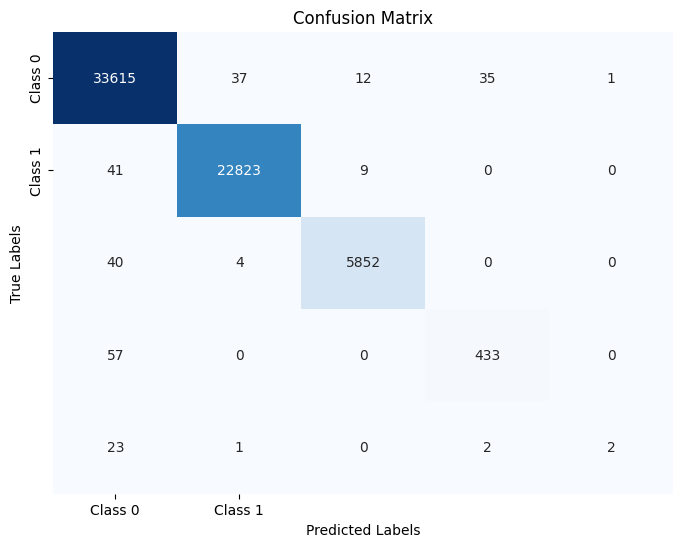

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, voting_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [77]:
import pickle

# Save the trained model to a file
with open('voting_classifier2.pkl', 'wb') as f:
    pickle.dump(voting_classifier, f)


In [78]:
with open('voting_classifier2.pkl', 'rb') as f:
    model = pickle.load(f)


sample_data =sample_data_ddos = {
    'duration': '09:49:23', 
    'wrong_fragment': 1, 
    'hot': '0x00', 
    'logged_in': 1, 
    'num_compromised': '128', 
    'root_shell': '1', 
    'num_root': '2', 
    'num_file_creations': '0', 
    'num_access_files': '32', 
    'same_srv_rate': '4097', 
    'srv_diff_host_rate': '0xb336', 
    'dst_host_count': '200', 
    'Dst Host Same Src Port Rate': '0.5',  # Increased to indicate half of the connections are from the same source port
    'Dst Host Rerror Rate': '0.1',  # Increased to indicate a higher rate of connections with RST error
    'Dst Host Serror Rate': '0.8',  # Increased to indicate a higher rate of connections with SYN error
    'Protocol Type ICMP': '0', 
    'Protocol Type TCP': '1',  # Set to 1 to indicate a focus on TCP protocol which is common in DDoS attacks
    'Protocol Type UDP': '0', 
    'Service Domain': '0', 
    'Service HTTP': '1',  # Set to 1 to indicate a focus on HTTP service which is often targeted in DDoS attacks
    'Service Telnet': '0', 
    'Flag OTH': '0', 
    'Flag REJ': '0', 
    'Flag RSTO': '0', 
    'Flag RSTOS0': '0', 
    'Flag RSTR': '0', 
    'Flag S0': '0', 
    'Flag S1': '0', 
    'Flag SF': '0'
}


sample_df =pd.DataFrame([sample_data])

sample_df_encoded = pd.get_dummies(sample_df)


sample_df_scaled = scaler.fit_transform(sample_df_encoded)

# Make predictions using the loaded model
predictions = model.predict(sample_df_encoded)

class_encoding = {0: 'Normal', 1: 'DoS', 2: 'Probe', 3: 'R2L', 4: 'U2R'}
predicted_class = class_encoding[predictions[0]]


# Print the predicted attack type
# print(sample_df)
# print(sample_df_encoded)
# print(sample_df_scaled)
print(predictions)
print("Predicted Attack Type:", predicted_class)


[0]
Predicted Attack Type: Normal
